# Preprocessing

## Initial setup

### Packages

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

import warnings
warnings.filterwarnings('ignore')

### Dataset reading

In [33]:
original_df = pd.read_csv('../data/dataset.csv')
print(f"Dataset loaded: {original_df.shape[0]} rows × {original_df.shape[1]} columns")
print(original_df.columns)

Dataset loaded: 21742 rows × 58 columns
Index(['Unnamed: 0', 'id', 'title', 'subtitle', 'sq_mt_built', 'sq_mt_useful',
       'n_rooms', 'n_bathrooms', 'n_floors', 'sq_mt_allotment', 'latitude',
       'longitude', 'raw_address', 'is_exact_address_hidden', 'street_name',
       'street_number', 'portal', 'floor', 'is_floor_under', 'door',
       'neighborhood_id', 'operation', 'rent_price', 'rent_price_by_area',
       'is_rent_price_known', 'buy_price', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'are_pets_allowed', 'has_ac',
       'has_fitted_wardrobes', 'has_lift', 'is_exterior', 'has_garden',
       'has_pool', 'has_terrace', 'has_balcony', 'has_storage_room',
       'is_furnished', 'is_kitchen_equipped', 'is_accessible',
       'has_green_zones', 'energy_certificate', 'has_parking',
       'has_private_parking', 'has_public_parking',
     

We just keep the columns we will be processing

In [48]:
columns = ['street_name',
           'floor',
           'house_type_id',
           'has_central_heating',
           'has_individual_heating',
           'buy_price'
        ]
df = original_df[columns]

### NaN analysis

We display the information of NaN (null) for by columns

In [51]:
nulls = df.isnull().mean() * 100
print("NaN percentage by column:")
display(nulls.sort_values(ascending=False))

NaN percentage by column:


has_central_heating       37.411462
has_individual_heating    37.411462
street_name               27.159415
floor                     11.990617
house_type_id              1.798363
buy_price                  0.000000
dtype: float64

### Distinct values analysis

Distinct values in street_name:
street_name
NaN                                     5905
Paseo de la Castellana                   116
Calle de Bravo Murillo                    69
Calle del Príncipe de Vergara             60
Calle de Embajadores                      58
                                        ... 
Calle Peonias                              1
Calle de Hermenegildo Bielsa               1
Avenida de los arces                       1
Calle del Estrecho de Mesina, Madrid       1
Calle Burriana                             1
Name: count, Length: 6163, dtype: int64
---------
Distinct values in floor:
floor
1                       4440
2                       3546
3                       3001
NaN                     2607
4                       2323
Bajo                    2144
5                       1310
6                        913
7                        556
8                        326
Entreplanta exterior     236
9                        181
Semi-sótano exterior      55
Se

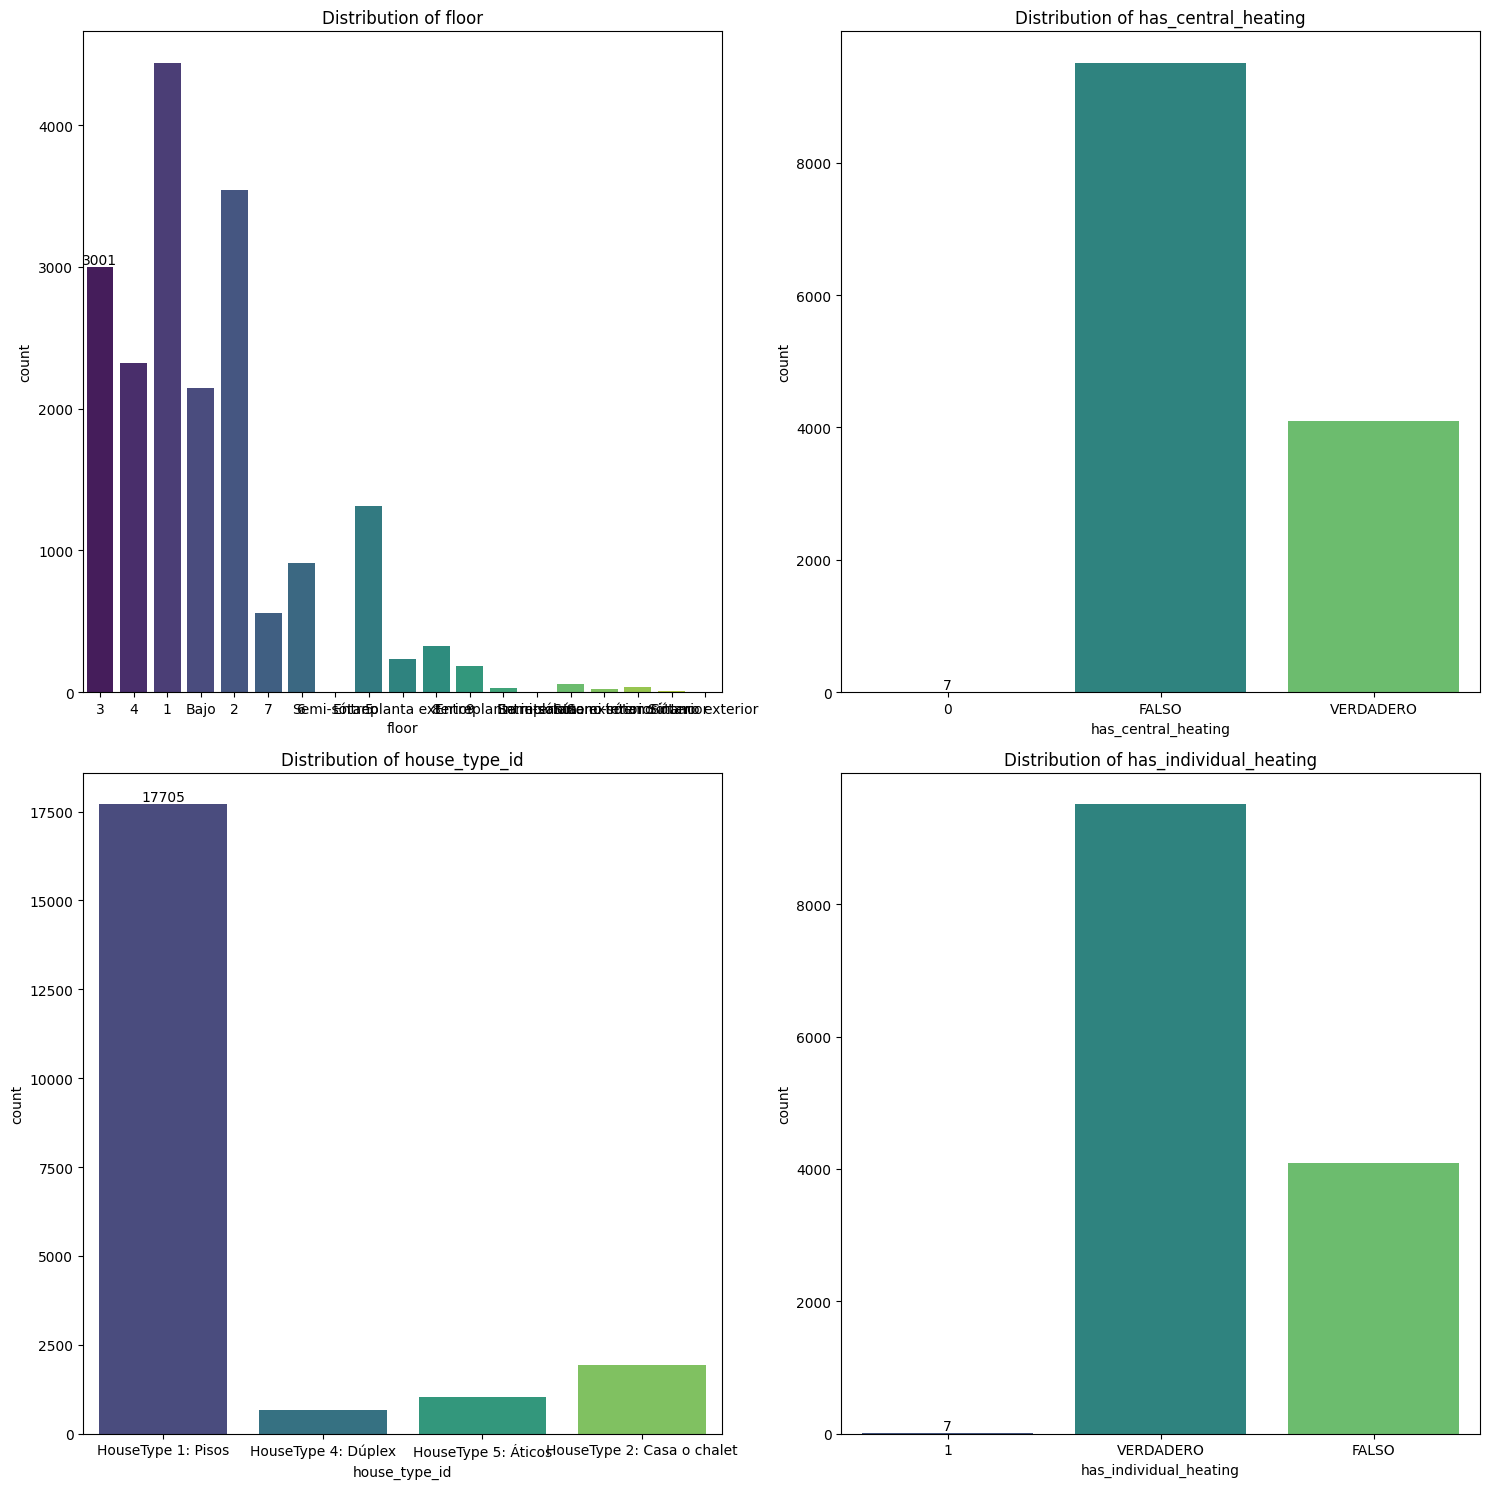

In [36]:
print("Distinct values in street_name:")
print(df['street_name'].value_counts(dropna=False))
print('---------')

print("Distinct values in floor:")
print(df['floor'].value_counts(dropna=False))
print('---------')

print("Distinct values in house_type_id:")
print(df['house_type_id'].value_counts(dropna=False))
print('---------')

print("Distinct values in has_central_heating:")
print(df['has_central_heating'].value_counts(dropna=False))
print('---------')

print("Distinct values in has_individual_heating:")
print(df['has_individual_heating'].value_counts(dropna=False))
print('---------')

fig, axes = plt.subplots(2, 2, figsize=(15, 15))


sns.countplot(x='floor', data=df, ax=axes[0][0], palette='viridis')
axes[0][0].set_title('Distribution of floor')
axes[0][0].set_xlabel('floor')
axes[0][0].bar_label(axes[0][0].containers[0])

sns.countplot(x='house_type_id', data=df, ax=axes[1][0], palette='viridis')
axes[1][0].set_title('Distribution of house_type_id')
axes[1][0].set_xlabel('house_type_id')
axes[1][0].bar_label(axes[1][0].containers[0])

sns.countplot(x='has_central_heating', data=df, ax=axes[0][1], palette='viridis')
axes[0][1].set_title('Distribution of has_central_heating')
axes[0][1].set_xlabel('has_central_heating')
axes[0][1].bar_label(axes[0][1].containers[0])

sns.countplot(x='has_individual_heating', data=df, ax=axes[1][1], palette='viridis')
axes[1][1].set_title('Distribution of has_individual_heating')
axes[1][1].set_xlabel('has_individual_heating')
axes[1][1].bar_label(axes[1][1].containers[0])

plt.tight_layout()
plt.show()

## Column preprocessing

### Preprocess floor column

#### Standarization


Value counts
floor
 9.0     181
 8.0     326
 7.0     556
 6.0     913
 5.0    1310
 4.0    2323
 3.0    3001
 2.0    3546
 1.0    4440
 0.5     271
 0.0    2144
-0.5      92
-1.0      32
 NaN    2607
Name: count, dtype: int64
------------------------------------------------------------------------------
Mean: 2.6151816043898615
Median: 2.0
------------------------------------------------------------------------------


<Axes: title={'center': 'Floor distribution'}, ylabel='Frequency'>

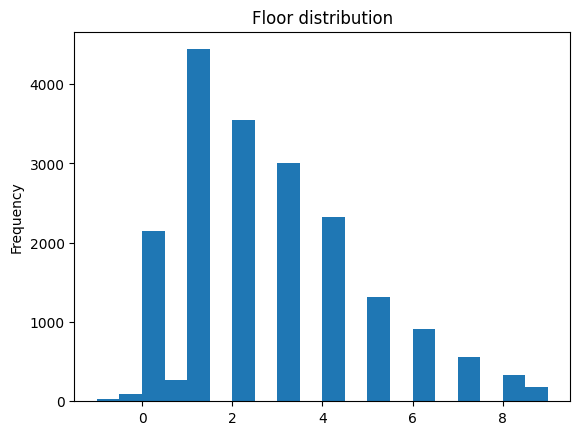

In [37]:
floor_map = {
    'Bajo': 0,
    'Entreplanta': 0.5,
    'Entreplanta interior': 0.5,
    'Entreplanta exterior': 0.5,
    'Semi-sótano': -0.5,
    'Semi-sótano interior': -0.5,
    'Semi-sótano exterior': -0.5,
    'Sótano': -1,
    'Sótano interior': -1,
    'Sótano exterior': -1
}

df['floor'] = df['floor'].replace(floor_map)
df['floor'] = pd.to_numeric(df['floor'], errors='coerce')

print("Value counts")
print(df['floor'].value_counts(dropna=False).sort_index(ascending=False))
print("------------------------------------------------------------------------------")
print("Mean:", df['floor'].mean())
print("Median:", df['floor'].median())
print("------------------------------------------------------------------------------")

df['floor'].plot(kind='hist', bins=20, title='Floor distribution')

#### Imputation of missing values

In [38]:
# 1. CORRELATION WITH NUMERIC FEATURES
original_df['floor'] = df['floor']
numeric_corr = original_df.corr(numeric_only=True)['floor'].drop('floor').sort_values(key=abs, ascending=False)

print("\n🔵 Numeric features most correlated with 'floor':")
print(numeric_corr)

# 2. VISUALIZE TOP CORRELATED NUMERIC FEATURES
top_numeric_features = numeric_corr[abs(numeric_corr) > 0.3].index  # threshold can be changed
if not top_numeric_features.empty:
    sns.pairplot(original_df, vars=top_numeric_features.tolist() + ['floor'])
    plt.show()

# 3. CORRELATION WITH CATEGORICAL FEATURES
categorical_cols = original_df.select_dtypes(include='object').columns  # object dtype = usually categorical

print("\n🟠 Average 'floor' by categorical feature:")
for col in categorical_cols:
    means = original_df.groupby(col)['floor'].mean().sort_values()
    print(f"\n{col}:\n{means}")

pvalues = []

for col in categorical_cols:
    groups = [group['floor'].dropna() for name, group in original_df.groupby(col)]
    if len(groups) > 1:
        f_val, p_val = scipy.stats.f_oneway(*groups)
        pvalues.append((col, p_val))

pvalues = sorted(pvalues, key=lambda x: x[1], reverse=True)


for pvalue in pvalues:
    print(f"ANOVA for {pvalue[0]}: p-value = {pvalue[1]}")


🔵 Numeric features most correlated with 'floor':
buy_price              0.157148
sq_mt_useful           0.151508
buy_price_by_area      0.148571
sq_mt_built            0.147173
n_rooms                0.146561
n_bathrooms            0.125489
built_year             0.034052
Unnamed: 0             0.025749
id                    -0.025749
parking_price          0.023478
rent_price            -0.023263
n_floors                    NaN
sq_mt_allotment             NaN
latitude                    NaN
longitude                   NaN
portal                      NaN
door                        NaN
rent_price_by_area          NaN
is_rent_price_known         NaN
are_pets_allowed            NaN
is_furnished                NaN
is_kitchen_equipped         NaN
has_private_parking         NaN
has_public_parking          NaN
Name: floor, dtype: float64

🟠 Average 'floor' by categorical feature:

title:
title
Piso en venta en General diaz porlier                     -1.0
Estudio en venta en calle de Bravo

No numeric column was found with sufficient correlation to conclude that they are related (values < 0.3). 

Because of that, we will just be using categorical columns with very small p-values. 
The column with the lowest p-value is is_floor_under, which has null values, and the second one is neighbourhood_id. We will group by neighbourhood_id and then impute with the median for that group.

In [39]:
valid_floors = df['floor'].dropna().unique()

def snap_to_valid_floor(x, valid_floors):
    if pd.isna(x):
        return np.nan

    return valid_floors[np.abs(valid_floors - x).argmin()]

df['floor'] = df['floor'].fillna(
    original_df.groupby(['neighborhood_id'])['floor'].transform('median')
)

# We remove values invented by the median (for instance, 2.5)
df['floor'] = df['floor'].apply(lambda x: snap_to_valid_floor(x, valid_floors))

We check that all the null values were properly imputed into valid values. Also, we can see that the distribution has remained almost the same.

Value counts
floor
 9.0     181
 8.0     326
 7.0     556
 6.0     913
 5.0    1310
 4.0    2348
 3.0    3721
 2.0    4886
 1.0    4962
 0.5     271
 0.0    2144
-0.5      92
-1.0      32
Name: count, dtype: int64
------------------------------------------------------------------------------
Mitjana: 2.552824027228406
Mediana: 2.0
------------------------------------------------------------------------------


<Axes: title={'center': 'Floor distribution'}, ylabel='Frequency'>

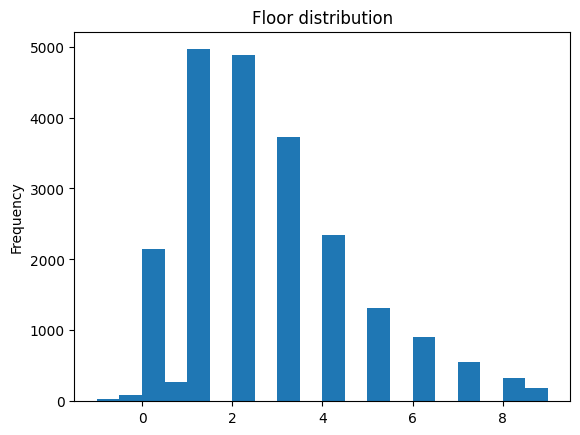

In [40]:
print("Value counts")
print(df['floor'].value_counts(dropna=False).sort_index(ascending=False))
print("------------------------------------------------------------------------------")
print("Mitjana:", df['floor'].mean())
print("Mediana:", df['floor'].median())
print("------------------------------------------------------------------------------")

df['floor'].plot(kind='hist', bins=20, title='Floor distribution')

### Preprocess house type column

#### Standarization and renaming

In [41]:
house_type_map = {
    'HouseType 1: Pisos' : 'Piso',
    'HouseType 2: Casa o chalet' : 'Casa',
    'HouseType 5: Áticos': 'Ático',
    'HouseType 4: Dúplex': 'Dúplex',
}

df['house_type'] = df['house_type_id'].replace(house_type_map)

print("Valores únicos en house_type:")
print(df['house_type'].value_counts(dropna=False))

Valores únicos en house_type:
house_type
Piso      17705
Casa       1938
Ático      1032
Dúplex      676
NaN         391
Name: count, dtype: int64


#### Imputation of missing values

Hay muy pocos valores nulos, de modo que podemos permitirnos imputarlos por la mediana.

In [42]:
df['house_type'].fillna(df['house_type'].mode()[0], inplace=True)

print("Valores únicos en house_type:")
print(df['house_type'].value_counts(dropna=False))

# fig, axes = plt.subplots(1, 1)
# sns.countplot(x='house_type', data=df, ax=axes, palette='viridis')
# axes.set_title('Distribución de house_type')
# axes.set_xlabel('house_type')
# axes.bar_label(axes.containers[0])

# plt.tight_layout()
# plt.show()

Valores únicos en house_type:
house_type
Piso      18096
Casa       1938
Ático      1032
Dúplex      676
Name: count, dtype: int64


### Preprocess heating_type column

#### Standarization and renaming

In [43]:
def determine_heating_type(row):
    if str(row['has_central_heating']).upper() in ['VERDADERO', '1']:
        return 'central'
    elif str(row['has_individual_heating']).upper() in ['VERDADERO', '1']:
        return 'individual'
    else:
        return 'unknown'

# Apply the function
df['heating_type'] = df.apply(determine_heating_type, axis=1)

print("Valores únicos en heating_type:")
print(df['heating_type'].value_counts(dropna=False))

Valores únicos en heating_type:
heating_type
individual    9516
unknown       8134
central       4092
Name: count, dtype: int64


### Preprocess street name column

#### Imputation of null values

In [44]:
df['street_name'] = df['street_name'].fillna('unknown')

print("Valores únicos en street_name:")
print(df['street_name'].value_counts(dropna=False))


Valores únicos en street_name:
street_name
unknown                                 5905
Paseo de la Castellana                   116
Calle de Bravo Murillo                    69
Calle del Príncipe de Vergara             60
Calle de Embajadores                      58
                                        ... 
Calle Peonias                              1
Calle de Hermenegildo Bielsa               1
Avenida de los arces                       1
Calle del Estrecho de Mesina, Madrid       1
Calle Burriana                             1
Name: count, Length: 6163, dtype: int64


### Preprocess buy_price column (answer variable)

#### Analysis of the variable

Distinct values in buy_price:
buy_price
550000     170
135000     149
650000     146
130000     139
160000     138
          ... 
1879700      1
2279700      1
852000       1
2172000      1
388000       1
Name: count, Length: 2403, dtype: int64


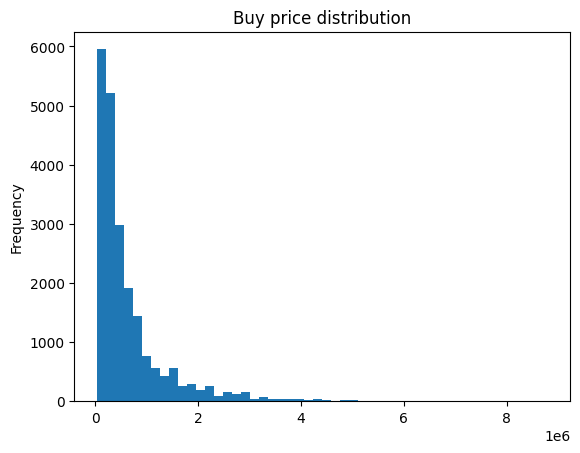

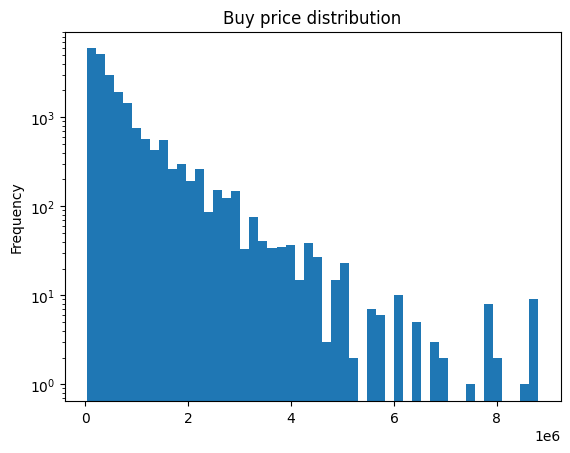

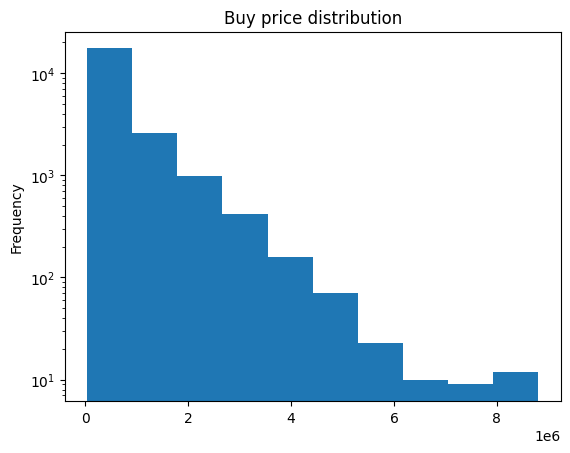

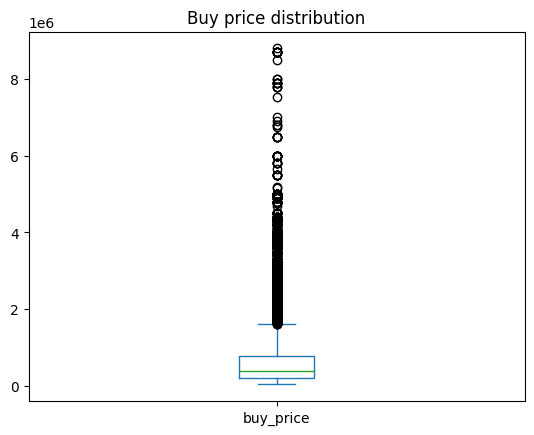

In [103]:
print("Distinct values in buy_price:")
print(df['buy_price'].value_counts(dropna=False))

df['buy_price'].plot(kind='hist', bins=50, title='Buy price distribution')
plt.show()
# Plot with logarithmic scale
df['buy_price'].plot(kind='hist', bins=50, title='Buy price distribution', logy=True)
plt.show()
# Plot with logarithmic scale and 10 bins
df['buy_price'].plot(kind='hist', bins=10, title='Buy price distribution', logy=True)
plt.show()
# Plot with boxplot
df['buy_price'].plot(kind='box', title='Buy price distribution')
plt.show()

#### Discretize the values

Low: [36000.0, 175000.0)
Medium-Low: [175000.0, 288000.0)
Medium: [288000.0, 495000.0)
Medium-High: [495000.0, 899000.0)
High: [899000.0, 8800000.0)


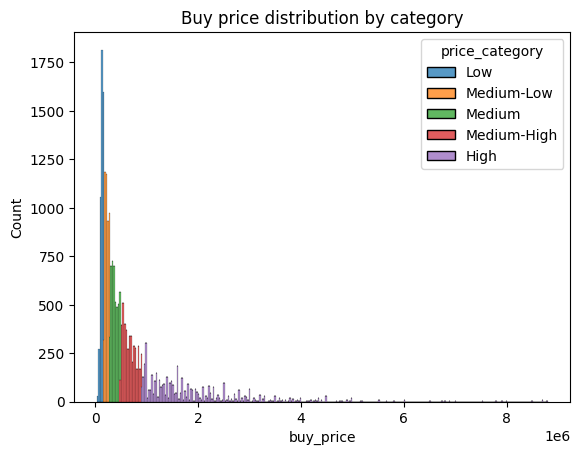

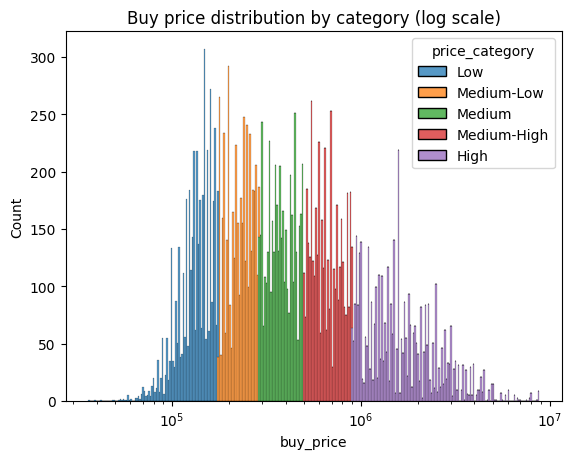

In [102]:
labels = ['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High']

# Preprocess
df['price_category'], bins = pd.qcut(df['buy_price'],
                                     q=5,
                                     labels=labels,
                                     retbins=True)

# For each price category, print the lower and upper bounds
for i, label in enumerate(labels):
    print(f"{labels[i]}: [{bins[i]}, {bins[i+1]})")

sns.histplot(data=df,
             x='buy_price',
             hue='price_category',
             bins=300,
             log_scale=False,
             multiple='stack')
plt.title('Buy price distribution by category')
plt.show()

sns.histplot(data=df,
             x='buy_price',
             hue='price_category',
             bins=300,
             log_scale=True, 
             multiple='stack')
plt.title('Buy price distribution by category (log scale)')
plt.show()

### Final processing

#### Delete old columns

In [29]:
if 'has_central_heating' in df.columns:
    df.drop('has_central_heating', axis=1, inplace=True)
if 'has_individual_heating' in df.columns:
    df.drop('has_individual_heating', axis=1, inplace=True)
if 'house_type_id' in df.columns:
    df.drop('house_type_id', axis=1, inplace=True)

## Final results

In [30]:
df.head()
nulls = df.isnull().mean() * 100
print("Porcentage de nulos por columna:")
display(nulls.sort_values(ascending=False))

Porcentage de nulos por columna:


street_name     0.0
floor           0.0
house_type      0.0
heating_type    0.0
dtype: float64